# Random Forest

## Contents:

#### 1. Importing libraries and data
#### 2. Data wrangling
#### 3. Reshaping for modeling
#### 4. Splitting data
#### 5. Random Forest Model
#### 6. Importances (stations)

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Create Path

path = r'C:\Users\lisad\OneDrive\Homework\Machine Learning with Python\Achievement 2'

In [13]:
# Import cleaned weather data

X = pd.read_csv(os.path.join(path, 'Data Sets', 'unscaled_weather_cleaned_withdate.csv'), index_col = False)

In [14]:
# Check

X.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  19600101      1                  7            0.85           1.018   
1  19600102      1                  6            0.84           1.018   
2  19600103      1                  8            0.90           1.018   
3  19600104      1                  3            0.92           1.018   
4  19600105      1                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  \
0              6.5             0.8  ...                 4.9   
1              6.1             3.3  ...                 5.0   
2              8.5             5.1  ...                 4.1   
3              6.3             3.8  ...                 2.3   
4              3.0            -0.7  ...                 4.3   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   
1                     7               0.91             1.0007   
2                     7               0.91             1.0096   
3                     7               0.86             1.0184   
4                     3               0.80             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 137 columns]

In [15]:
# Check shape

X.shape

(22950, 137)

In [16]:
# Import predictions data

answers = pd.read_csv(os.path.join(path, 'Data Sets', 'Pleasant_Weather.csv'), index_col = False)

In [17]:
# Check

answers.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [18]:
# Check shape

answers.shape

(22950, 16)

## 2. Data wrangling

In [19]:
# Reducing dataset to 2000-2009

dfdecade = X[X['DATE'].astype(str).str.startswith('200')]
dfdecade

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
14610  20000101      1                  8            0.89          1.0286   
14611  20000102      1                  8            0.87          1.0318   
14612  20000103      1                  5            0.81          1.0314   
14613  20000104      1                  7            0.79          1.0262   
14614  20000105      1                  5            0.90          1.0246   
...         ...    ...                ...             ...             ...   
18258  20091227     12                  7            0.80          1.0118   
18259  20091228     12                  7            0.82          1.0084   
18260  20091229     12                  7            0.92          1.0028   
18261  20091230     12                  8            0.92          0.9979   
18262  20091231     12                  7            0.93          0.9958   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
14610                    0.20                 0.03             0.0   
14611                    0.25                 0.00             0.0   
14612                    0.50                 0.00             3.7   
14613                    0.63                 0.35             6.9   
14614                    0.51                 0.07             3.7   
...                       ...                  ...             ...   
18258                    0.37                 0.18             2.3   
18259                    0.28                 0.42             0.3   
18260                    0.22                 1.68             0.2   
18261                    0.18                 1.54             0.0   
18262                    0.17                 0.57             0.1   

       BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  \
14610              2.9             1.6  ...                 0.7   
14611              3.6             2.7  ...                 2.0   
14612              2.2             0.1  ...                 2.8   
14613              3.9             0.5  ...                 4.6   
14614              6.0             3.8  ...                 2.9   
...                ...             ...  ...                 ...   
18258              1.0            -3.9  ...                -2.7   
18259              3.2             1.0  ...                 2.4   
18260              4.5             2.4  ...                 0.8   
18261              8.5             7.5  ...                -7.4   
18262              6.6             4.3  ...                -6.5   

       VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
14610                     6               0.89             1.0235   
14611                     8               0.92             1.0177   
14612                     4               0.79             1.0154   
14613                     6               0.76             1.0099   
14614                     7               0.81             0.9957   
...                     ...                ...                ...   
18258                     4               0.72             1.0039   
18259                     8               0.70             0.9975   
18260                     8               0.88             0.9866   
18261                     8               0.87             0.9862   
18262                     6               0.80             1.0029   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
14610                       0.22                    0.10                0.7   
14611                       0.13                    0.42                0.0   
14612                       0.22                    1.05                1.2   
14613                       0.36                    0.34                3.5   
14614                       0.12                    0.33                0.0   
...                          ...                     ...                ...   
18258                       0.37                    0.01  

In [22]:
# Reduce answers dataset to 2000-2009

answers_decade = answers[answers['DATE'].astype(str).str.startswith('200')]
answers_decade

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
14610  20000101                       0                          0   
14611  20000102                       0                          0   
14612  20000103                       0                          0   
14613  20000104                       0                          0   
14614  20000105                       0                          0   
...         ...                     ...                        ...   
18258  20091227                       0                          0   
18259  20091228                       0                          0   
18260  20091229                       0                          0   
18261  20091230                       0                          0   
18262  20091231                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
14610                          0                        0   
14611                          0                        0   
14612                          0                        0   
14613                          0                        0   
14614                          0                        0   
...                          ...                      ...   
18258                          0                        0   
18259                          0                        0   
18260                          0                        0   
18261                          0                        0   
18262                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
14610                            0                          0   
14611                            0                          0   
14612                            0                          0   
14613                            0                          0   
14614                            0                          0   
...                            ...                        ...   
18258                            0                          0   
18259                            0                          0   
18260                            0                          0   
18261                            0                          0   
18262                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
14610                        0                           0   
14611                        0                           0   
14612                        0                           0   
14613                        0                           0   
14614                        0                           0   
...                        ...                         ...   
18258                        0                           0   
18259                        0                           0   
18260                        0                           0   
18261                        0                           0   
18262                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
14610                            0                        0   
14611                            0                        0   
14612                            0                        0   
14613                            0                        0   
14614                            0                        0   
...                            ...                      ...   
18258                            0                        0   
18259                            0                        0   
18260                            0                        0   
18261                            0                        0   
18262                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
14610                          0                      0   
14611                          0    

In [23]:
# Set display options to show all rows

pd.set_option('display.max_rows', None)

In [24]:
# Extract stations list

stations = [col.split('_')[0] for col in dfdecade.columns if '_' in col]

In [25]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [26]:
# Create a dictionary to store the frequency of entries for each station
station_frequencies = {}

for station in unique_stations:
    # Select columns that belong to the current station
    station_columns = [col for col in  dfdecade.columns if col.startswith(station)]
    
    # Count non-missing entries across all columns for the station
    station_frequencies[station] =  dfdecade[station_columns].notna().sum().sum()

# Print the frequency of entries for each station
print("Frequency of entries for each weather station:")
for station, freq in station_frequencies.items():
    print(f"{station}: {freq} entries")

Frequency of entries for each weather station:
HEATHROW: 32877 entries
DEBILT: 32877 entries
BELGRADE: 32877 entries
BASEL: 32877 entries
DUSSELDORF: 32877 entries
SONNBLICK: 32877 entries
LJUBLJANA: 32877 entries
VALENTIA: 32877 entries
STOCKHOLM: 32877 entries
MUNCHENB: 32877 entries
KASSEL: 32877 entries
MADRID: 32877 entries
OSLO: 32877 entries
BUDAPEST: 32877 entries
MAASTRICHT: 32877 entries


#### Confirming the same number of entries for each station.

In [27]:
# Drop unnecessary columns

dfdecade.drop(['DATE', 'MONTH'], axis=1, inplace=True)

In [28]:
dfdecade.shape # observations dataset has the correct shape

(3653, 135)

In [29]:
answers_decade.drop(columns = 'DATE', inplace = True)

In [30]:
answers_decade.shape # predictions dataset has the correct shape

(3653, 15)

## 3. Reshaping for modeling
The final shapes should be X = (3653, 135) and y = (3653,) for one decade of information.

In [31]:
X = dfdecade

In [32]:
y = answers_decade

In [33]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [34]:
X.shape

(3653, 135)

In [35]:
y.shape

(3653, 15)

## 4. Splitting data

In [47]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [48]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(914, 135) (914, 15)


## 5. Random Forest Model

In [53]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [54]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.46936542669584247


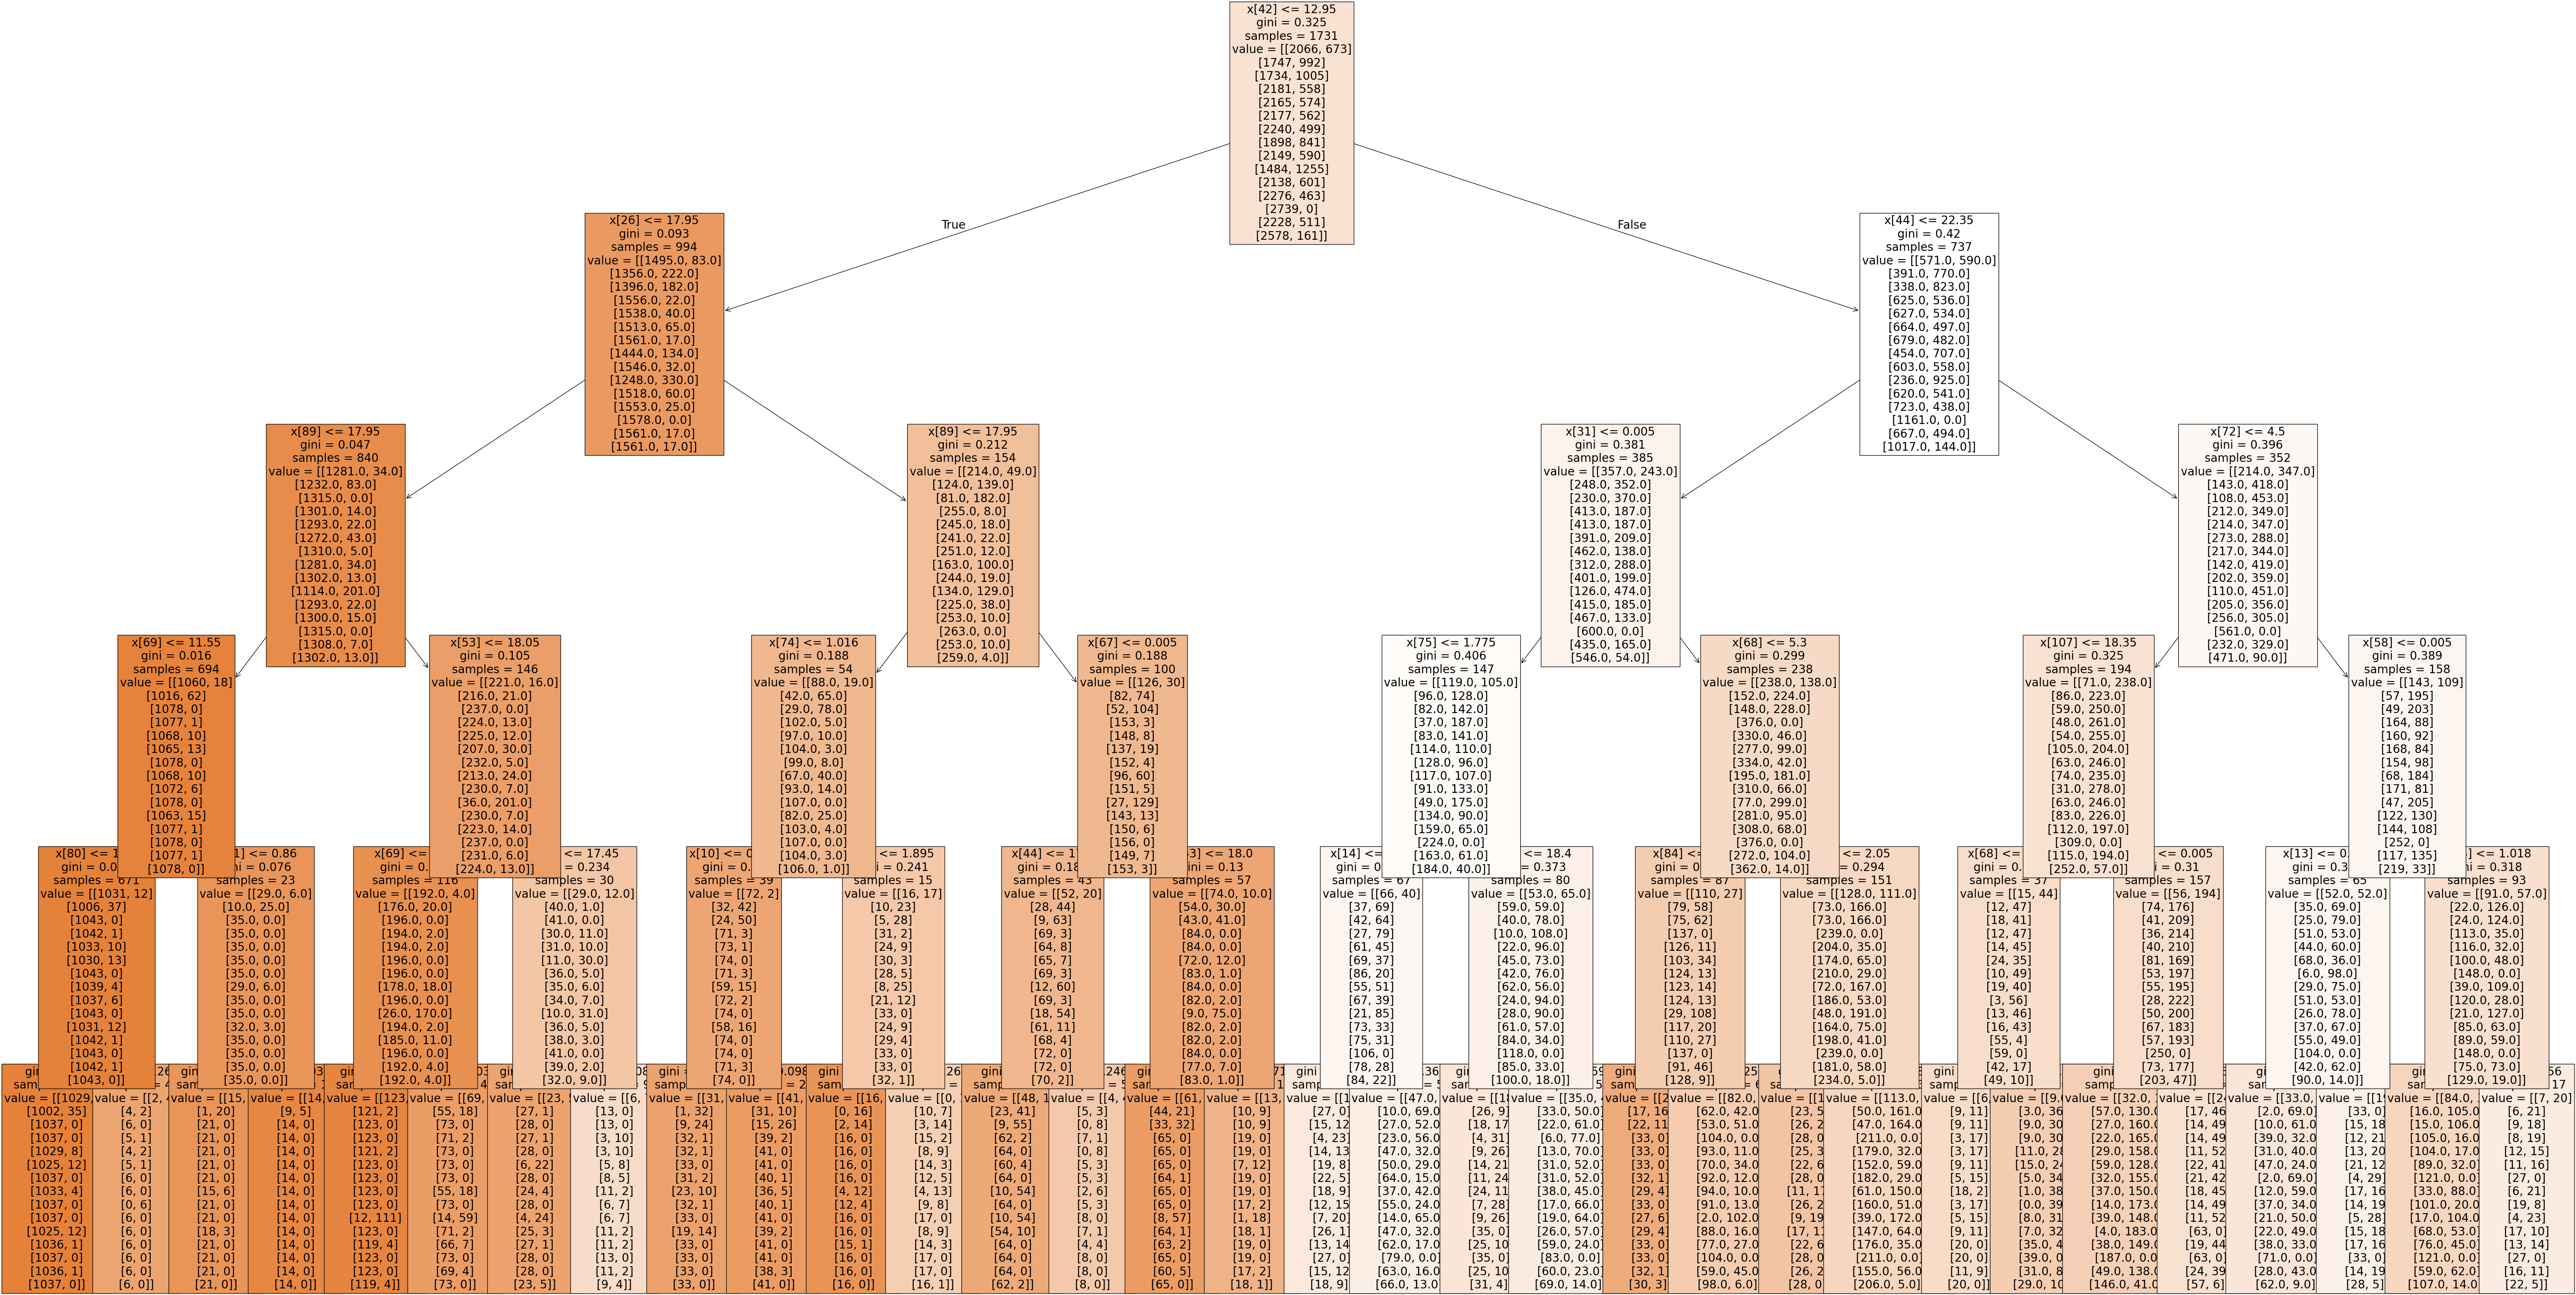

In [55]:
# Define class names for readability
class_names = ['Unpleasant Weather', 'Pleasant Weather']

# Plot the tree
fig = plt.figure(figsize=(80, 40))
plot_tree(clf.estimators_[15], 
          filled=True, 
          fontsize=20,
          feature_names=None,  # You can add your feature names here if you'd like
          class_names=class_names);  # Adds class labels at the leaves

In [56]:
fig.savefig(os.path.join(path, 'Visualizations', 'rf1_2000s.png'),bbox_inches='tight')

In [81]:
# Create a 2nd RF classifier
clf = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [82]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5547045951859956


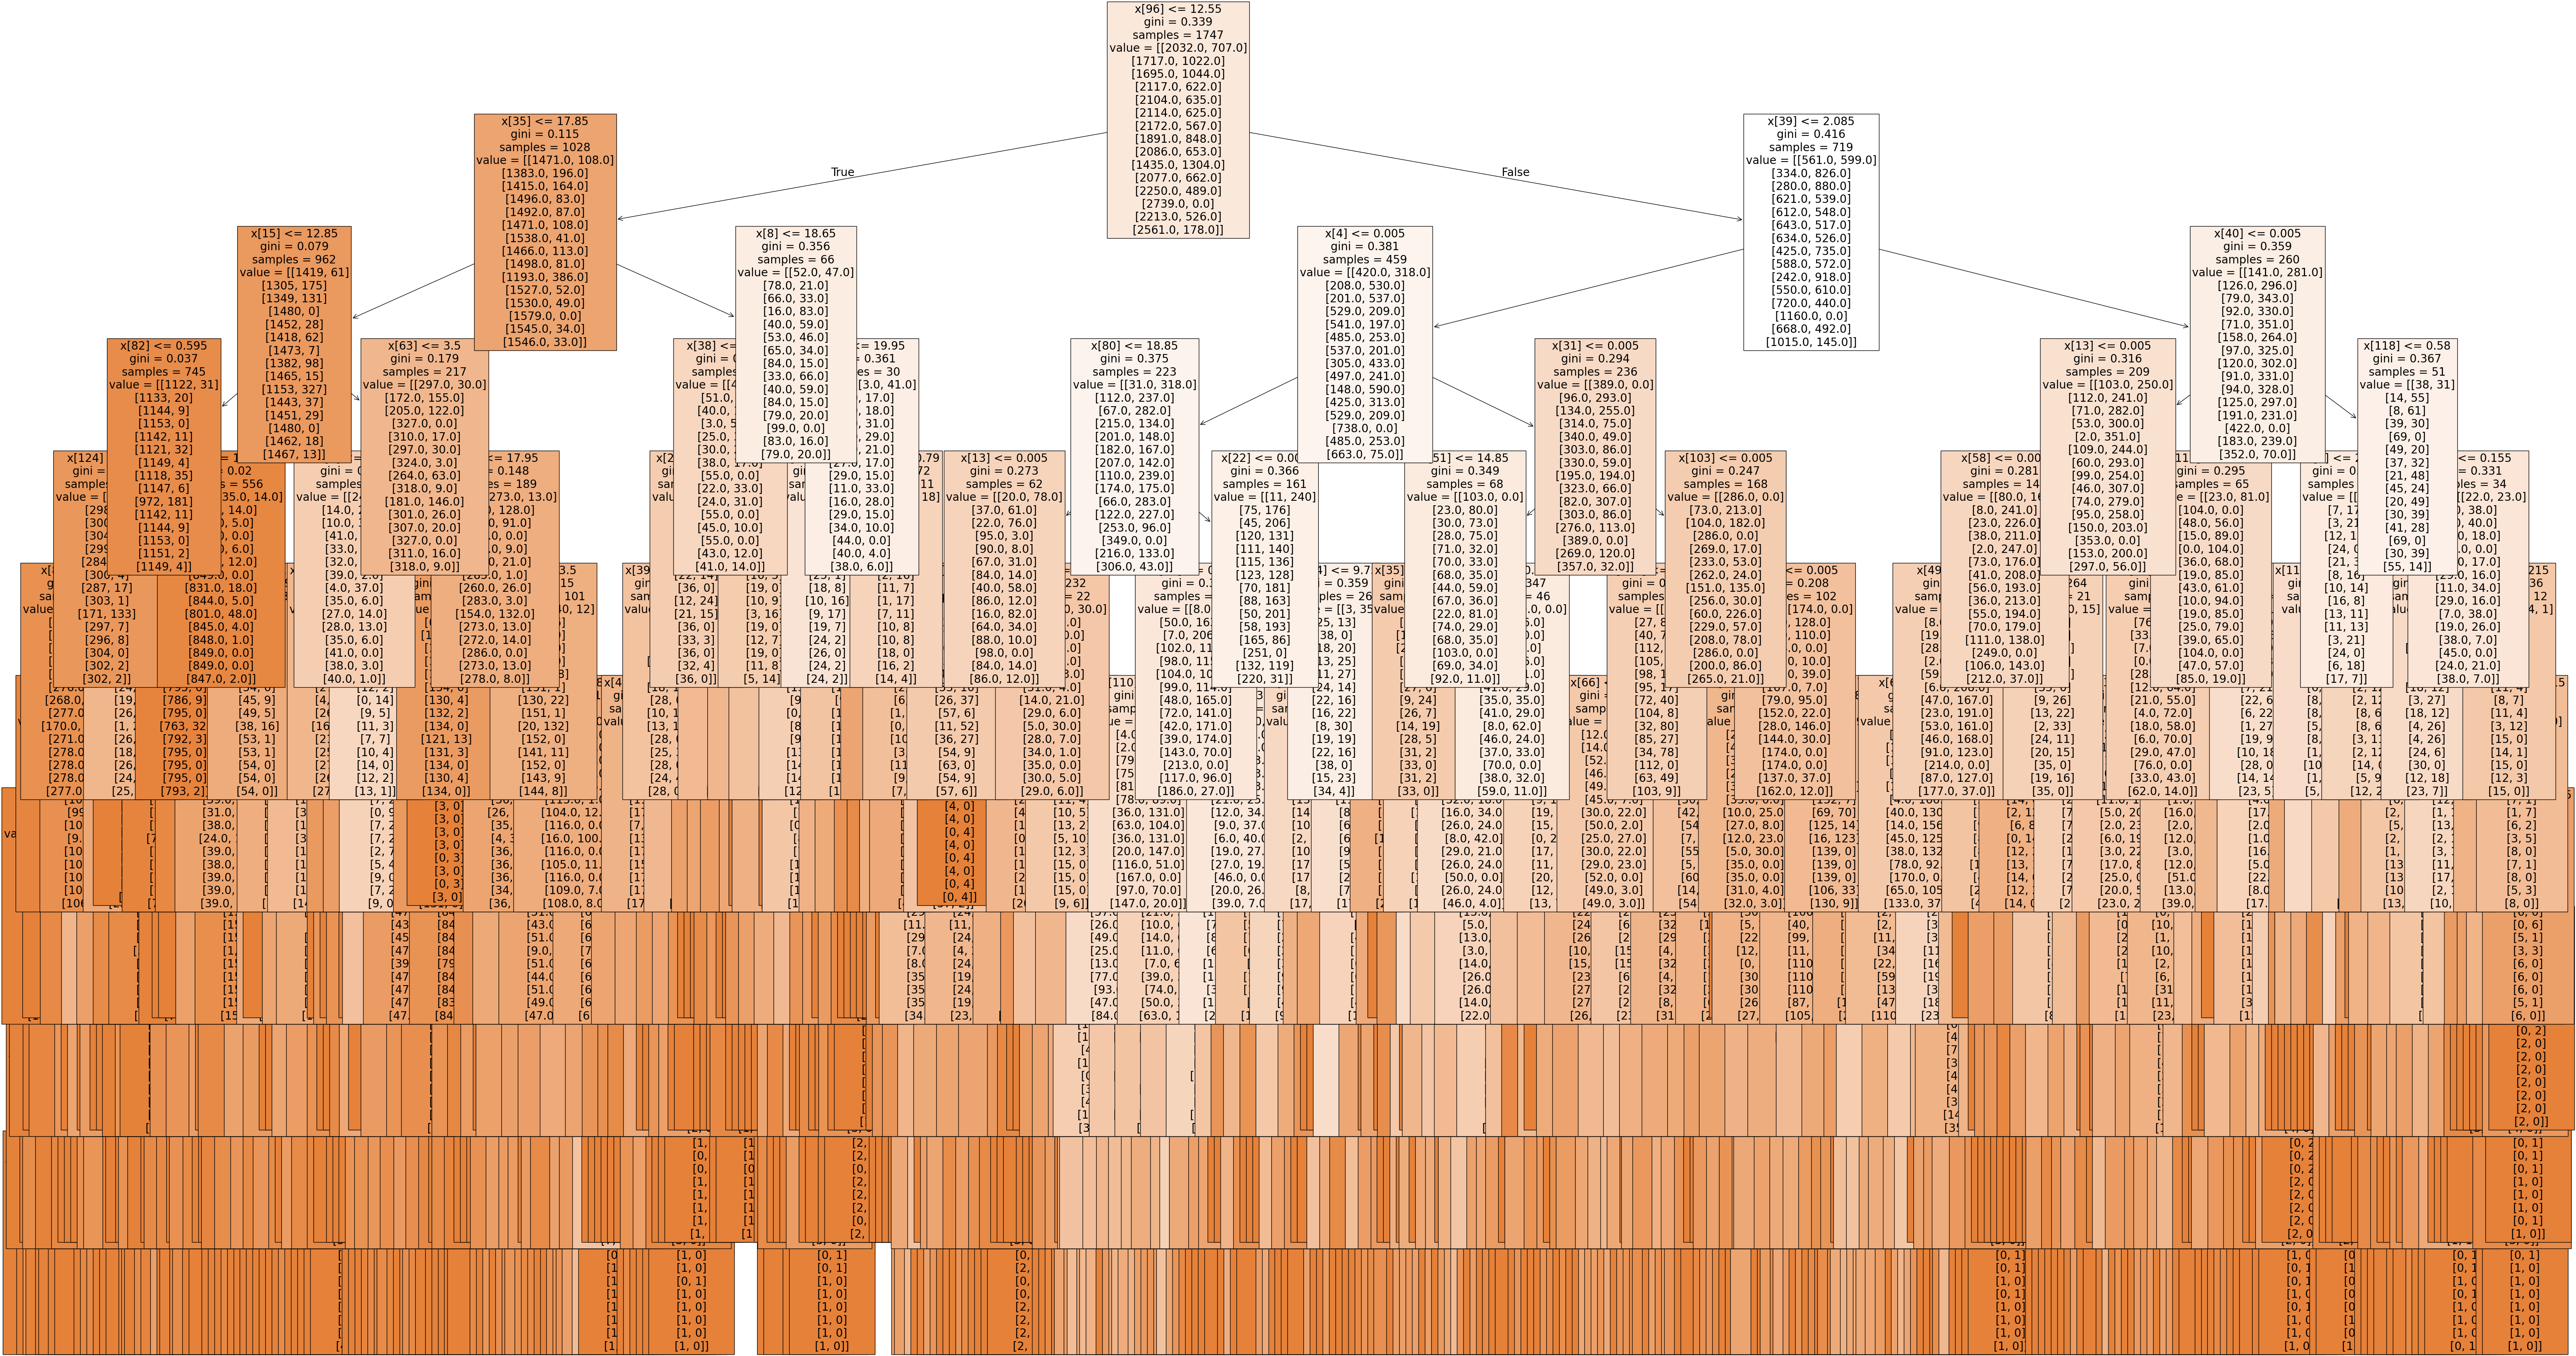

In [83]:
# Define class names for readability
class_names = ['Unpleasant Weather', 'Pleasant Weather']

# Plot the tree
fig = plt.figure(figsize=(80, 40))
plot_tree(clf.estimators_[15], 
          filled=True, 
          fontsize=20,
          feature_names=None,  # You can add your feature names here if you'd like
          class_names=class_names);  # Adds class labels at the leaves

In [84]:
fig.savefig(os.path.join(path, 'Visualizations', 'rf2_2000s.png'),bbox_inches='tight')

## 6. Importances (stations)

In [85]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape) # Should print: (135,)
newarray # This shows the raw importance values

(135,)


array([0.00223278, 0.00244929, 0.00228671, 0.00658752, 0.01614301,
       0.00700436, 0.02210349, 0.00200905, 0.01566156, 0.00295637,
       0.00293884, 0.00289077, 0.00348286, 0.01690019, 0.00317532,
       0.0080843 , 0.0022581 , 0.00967029, 0.00260261, 0.00319457,
       0.00199931, 0.00303107, 0.01157568, 0.00377597, 0.02140467,
       0.00793811, 0.02614417, 0.00504928, 0.00148616, 0.00348512,
       0.00409629, 0.02073736, 0.00462742, 0.01710025, 0.00175854,
       0.018736  , 0.00910064, 0.00172999, 0.00309644, 0.00469652,
       0.01666696, 0.01104777, 0.02186628, 0.00203146, 0.0362545 ,
       0.00144847, 0.00299446, 0.00395849, 0.00295045, 0.00881967,
       0.00301323, 0.01116895, 0.00198758, 0.0083141 , 0.0029075 ,
       0.0023691 , 0.0045218 , 0.00439583, 0.01735804, 0.00360219,
       0.03107572, 0.00491426, 0.02585581, 0.00362169, 0.00342735,
       0.00262671, 0.00322515, 0.01734248, 0.00401506, 0.01159539,
       0.00217376, 0.01812852, 0.0031016 , 0.00219638, 0.00302

In [86]:
# Reshape newarray (1, 15 stations, 9 features each)

newarray = newarray.reshape(-1,15,9)
print("Reshaped array shape:", newarray.shape)

Reshaped array shape: (1, 15, 9)


In [87]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.07647777, 0.05235704, 0.08166617, 0.07707643, 0.10649057,
       0.0446554 , 0.09700026, 0.06615609, 0.11173026, 0.06197212,
       0.08687613, 0.04891083, 0.02441682, 0.04432847, 0.01988566])

In [88]:
# Convert the set of unique stations to a list

unique_stations_list = list(unique_stations)

In [90]:
# Create sorted series and dataframe for plotting

important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

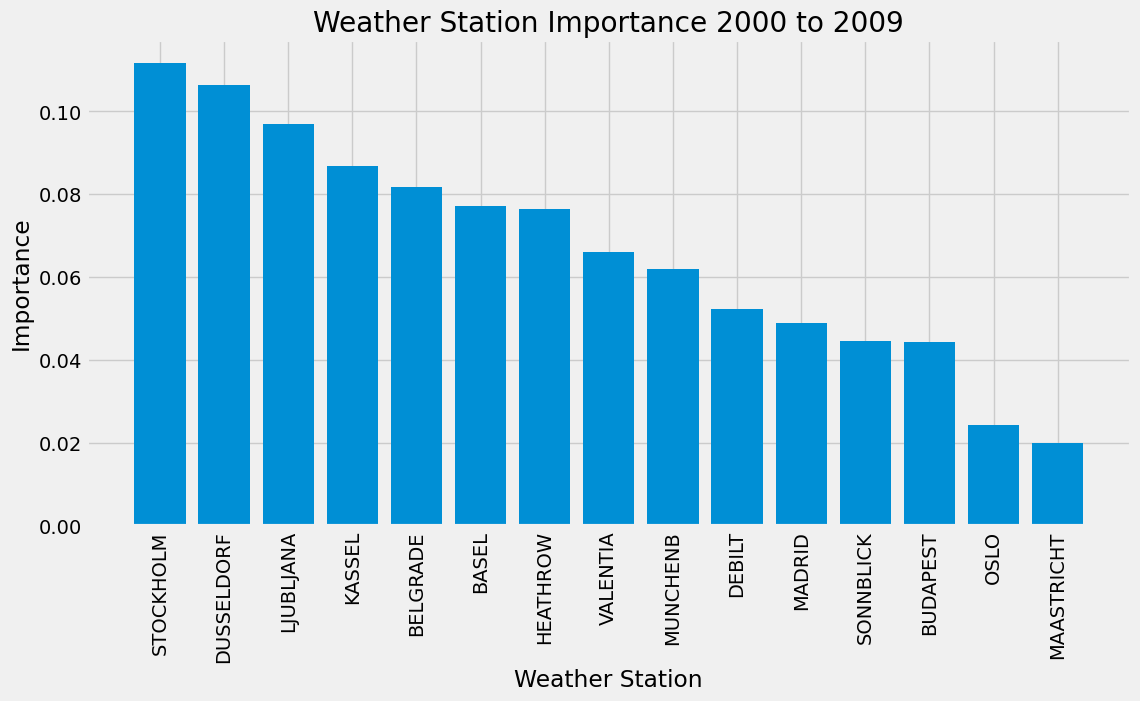

In [92]:
# Plot the results

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
plt.bar(df_importance['Weather Station'], df_importance['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2000 to 2009')

plt.savefig(os.path.join(path, 'Visualizations', 'station_immportance2000.png'), bbox_inches='tight')

plt.show()